## VN30F1M 1m timeframe - volume profile

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import numpy as np

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_1minute.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_1minute.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# ngay dao han phai sinh thang truoc la 2024-05-17 
data = data[data.index > '2024-05-20 23:00:00']
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-21 09:00:00,1307.7,1308.8,1307.0,1307.0,2701
2024-05-21 09:01:00,1306.7,1307.7,1306.7,1307.3,720
2024-05-21 09:02:00,1307.3,1308.1,1307.3,1308.0,994
2024-05-21 09:03:00,1308.1,1308.2,1308.0,1308.1,690
2024-05-21 09:04:00,1308.0,1309.2,1308.0,1309.1,1121
...,...,...,...,...,...
2024-06-24 14:27:00,1288.0,1288.0,1286.8,1286.8,1814
2024-06-24 14:28:00,1287.0,1287.7,1286.6,1287.5,1614
2024-06-24 14:29:00,1287.7,1288.5,1287.0,1287.1,2719


In [5]:
grpd = data.groupby('Close')[['Volume']]
irs = grpd.sum().reset_index()
irs

,Close,Volume
0,1257.2,3508
1,1257.4,2156
2,1258.0,964
3,1258.5,1819
4,1258.6,2613
...,...,...
743,1337.0,4363
744,1337.4,1840
745,1337.5,2831
746,1337.6,2801


<BarContainer object of 748 artists>

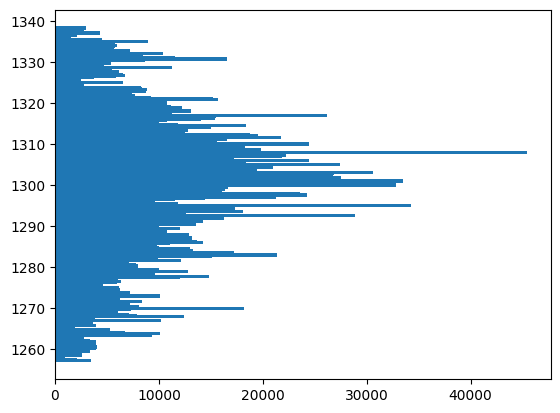

In [6]:
plt.barh(irs['Close'], irs['Volume'])

In [7]:
irs_volume_sort = irs.sort_values('Volume').reset_index()
irs_top30 = irs_volume_sort.tail(30)

<BarContainer object of 30 artists>

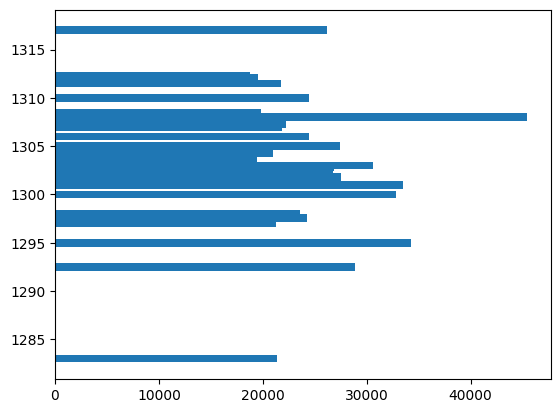

In [8]:
plt.barh(irs_top30['Close'], irs_top30['Volume'])

In [11]:
import plotly.graph_objects as go
df = data.tail(100)
df['MA5'] = df.Close.rolling(5).mean()
df['MA20'] = df.Close.rolling(20).mean()
df.dropna(inplace=True)


# plot the candlesticks
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df.Open, 
                                     high=df.High,
                                     low=df.Low,
                                     close=df.Close), 
                      go.Scatter(x=df.index, y=df.MA5, line=dict(color='orange', width=1)),
                      go.Scatter(x=df.index, y=df.MA20, line=dict(color='green', width=1))])

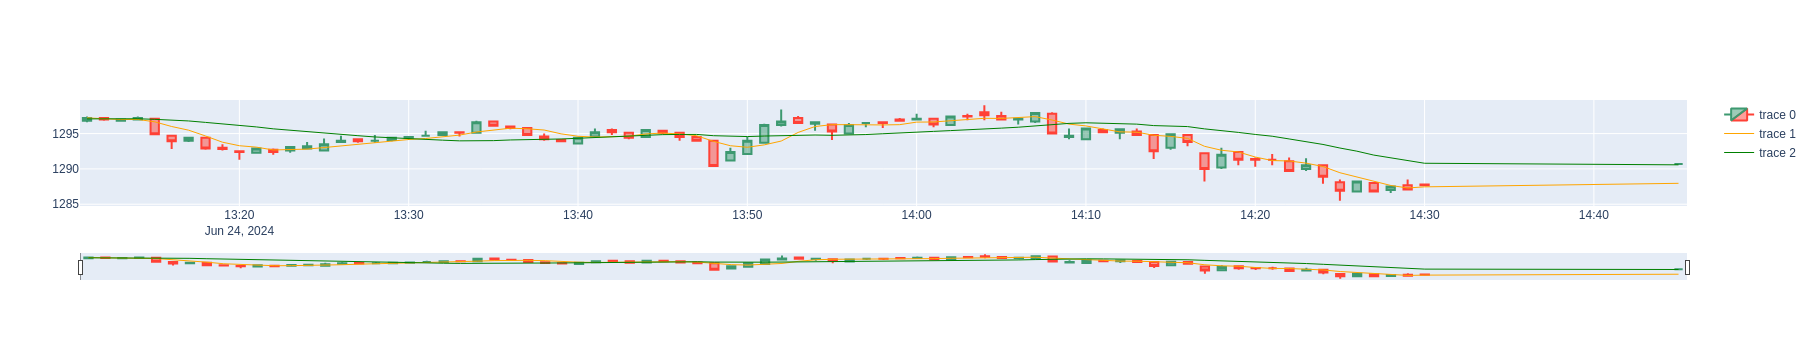

In [12]:
fig.show()